In [1]:
# https://www.mdpi.com/2076-3417/12/19/10077

In [2]:
import geopandas as gpd
import rasterio
import pandas as pd
from rasterio.sample import sample_gen
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,\
                            precision_score,recall_score,f1_score,roc_auc_score, roc_curve

# import matplotlib as plt
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore") 
warnings.filterwarnings("ignore", category=UserWarning)
import joblib
import os
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



### Load sample points and sar data


In [3]:
# Load SAR GeoTIFF
sar_image_path = "output/sar_image/eaton_sar_indices.tif"

# Load the CSV data
# training_data_path = 'sample_1_training_data.csv'
# training_data_path="sample_1_training_data_texture.csv"
training_data_path="output/sample/training_data_eaton_indices.csv"

training_data=pd.read_csv(training_data_path)
feature_column_names=["RBD_VV", "RBD_VH", "RBR_VV", "RBR_VH","ΔRVI",'Δvv_vh_ratio',"ΔRDFI","RCBI"]

class_column_name='class'
extended_file_name="_reproject"


output_model_dir="output/model/"


In [4]:
dataset = rasterio.open(sar_image_path)
# Get the number of bands
num_bands = dataset.count
print(f"Number of bands: {num_bands}")

# To get the names of the bands (if available)
# for i in range(1, num_bands + 1):
#     band_name = dataset.tags(i)  # Retrieve tags for the band
#     print(f"Band {i} name: {band_name}")

Number of bands: 8


In [5]:
# Separate features (SAR bands) and labels (e.g., class column)
X = training_data[feature_column_names]  # Features (SAR band values)
Y = training_data[class_column_name]  # Labels (add 'Class' column in your CSV if available)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [6]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Train-test split (assuming X_train and y_train are already defined)
# # X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# # Initialize the model
# gb_model = GradientBoostingClassifier(
#     n_estimators=1000,        # Allow a large number of trees initially
#     learning_rate=0.05,
#     max_depth=3,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     subsample=0.8,
#     random_state=42
# )

# # Initialize variables for early stopping
# best_score = -np.inf
# patience = 50  # Number of rounds to wait for improvement
# no_improvement_count = 0

# # Loop over the number of estimators
# for i in range(1, gb_model.n_estimators + 1):
#     # Fit the model up to the i-th iteration
#     gb_model.n_estimators = i
#     print((gb_model.n_estimators))
#     gb_model.fit(X_train, y_train)
    
#     # Calculate the validation score (e.g., accuracy)
#     val_score = gb_model.score(X_test, y_test)
#     print(val_score)
#     # Check if the validation score has improved
#     if val_score > best_score:
#         best_score = val_score
#         no_improvement_count = 0  # Reset the counter
#     else:
#         no_improvement_count += 1
    
#     # If no improvement for 'patience' rounds, stop training
#     if no_improvement_count >= patience:
#         print(f"Early stopping at iteration {i}")
#         break

# # Final model after early stopping
# print(f"Best validation score: {best_score}")


In [7]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Assuming X_train_full and y_train_full are already defined
# # Train-test split
# # X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# # Initialize the Random Forest model with a large number of trees
# rf_model = RandomForestClassifier(
#     n_estimators=1000,  # Allow a large number of trees initially
#     max_depth=10,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     random_state=42
# )

# # Initialize variables for early stopping
# best_score = -np.inf
# patience = 50  # Number of rounds to wait for improvement
# no_improvement_count = 0

# # Loop over the number of estimators (trees)
# for i in range(1, rf_model.n_estimators + 1):
#     # Incrementally fit the Random Forest model with the i-th number of trees
#     rf_model.set_params(n_estimators=i)
#     rf_model.fit(X_train, y_train)
    
#     # Calculate the validation score (e.g., accuracy)
#     val_score = rf_model.score(X_test, y_test)
#     print(f"Iteration {i}, Validation Score: {val_score}")
    
#     # Check if the validation score has improved
#     if val_score > best_score:
#         best_score = val_score
#         no_improvement_count = 0  # Reset the counter
#     else:
#         no_improvement_count += 1
    
#     # If no improvement for 'patience' rounds, stop training
#     if no_improvement_count >= patience:
#         print(f"Early stopping at iteration {i}")
#         break

# # Final model after early stopping
# print(f"Best validation score: {best_score}")


In [8]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define base learners (models to be stacked)
# base_learners = [
#     ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
#     ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
#     ('svm', SVC(probability=True, random_state=42))
# ]

# # Meta-model (Logistic Regression)
# meta_model = LogisticRegression()

# # Create the Stacking Classifier
# stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# # Train the Stacking model
# stacking_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_stack = stacking_model.predict(X_test)

# # Evaluate the Stacking model's performance
# accuracy_stack = accuracy_score(y_test, y_pred_stack)
# print(f"Accuracy of Stacking model: {accuracy_stack:.2f}")


In [9]:
#indices_tex
# RF_Model_1=RandomForestClassifier(n_estimators= 150, min_samples_split= 8, max_features= 9, max_depth= 10)

#gamma_indices
# RF_Model_1=RandomForestClassifier(n_estimators= 100, min_samples_split= 8, max_features= 20, max_depth= 8)

#gamma
# RF_Model_0=RandomForestClassifier(n_estimators= 150, min_samples_split= 15, max_features= 20, max_depth= 12)
# RF_Model_1=RandomForestClassifier(n_estimators= 200, min_samples_split= 8, max_features= 20, max_depth= 8)
# {'n_estimators': 150, 'min_samples_split': 20, 'max_features': 4, 'max_depth': 15}
#indices
# RF_Model_0=RandomForestClassifier(n_estimators= 150, min_samples_split= 4, max_features= 20, max_depth= 10)
# RF_Model_1=RandomForestClassifier(n_estimators= 150, min_samples_split= 8, max_features= 7, max_depth= 8)


#eaton indices
# RF_Model_0=RandomForestClassifier(n_estimators= 200,random_state=42)
# max_depth= 8
# {'n_estimators': 100, 'min_samples_split': 40, 'max_features': 3, 'max_depth': 8}
RF_Model_0=RandomForestClassifier(n_estimators= 100, min_samples_split= 40, max_features= 3,max_depth= 8,bootstrap=True)
# RF_Model_1=RandomForestClassifier(n_estimators= 100, min_samples_split= 4, max_features= 8, max_depth= 5)
# RF_Model_0 = RandomForestClassifier(
#     n_estimators=100,               # Number of trees in the forest
#     max_depth=None,                  # Trees can grow deep to capture complex patterns
#     min_samples_split=2,             # Minimum samples required to split an internal node
#     min_samples_leaf=1,              # Minimum samples required to be at a leaf node
#     max_features='sqrt',             # Use square root of the total features for each split
#     bootstrap=True,                  # Use bootstrap sampling (default)
#     n_jobs=-1,                       # Use all available processors
#     random_state=42                  # Ensures reproducibility
# )

# SVM_Model = svm.SVC()
SVM_Model= LinearSVC(random_state=42, tol=1e-3)

In [10]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

models={
    "RandomForest0": RF_Model_0,
    # "SVM_Model": SVM_Model
    # "RandomForest1": RF_Model_1,
    # "RandomForest2": RF_Model_2,
    # "RandomForest3": RF_Model_3,
    # "RandomForest4": RF_Model_4,
    # "RandomForest5": RF_Model_5,

    # "Decision Tree":DecisionTreeClassifier(),
    # "Logistic Regression":LogisticRegression()
    # "XGBoost": XGB_Model
}


for i in range(len(list(models))):
    model_name=list(models.keys())[i]
    print(f"***************{model_name}*********************")
    model=list(models.values())[i]

    # scaler = StandardScaler()
    # pixels_scaled = scaler.fit_transform(pixels)  # Apply scaling to the pixels
    # X_train=scaler.fit_transform(X_train)
    model.fit(X_train, y_train)
    # print("score",model.score(X_test,y_test))

    #Make a prediction
    y_train_pred=model.predict(X_train)
    # y_test_pred=model.predict(scaler.transform(X_test))
    y_test_pred=model.predict(X_test)


    #Training set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc_score=roc_auc_score(y_train,y_train_pred)

    #Test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc_score=roc_auc_score(y_test,y_test_pred)

    # print(model)
    print('Model performance for Training set')
    print(f"- Accuracy: {model_train_accuracy}")
    print(f"- F1 Score: {model_train_f1}")
    print(f"- Precision Score: {model_train_precision}")
    print(f"- Recall Score: {model_train_recall}")
    print(f"- Roc Auc Score: {model_train_roc_auc_score}")

    print("--------------")
    print('Model performance for Test set')
    print(f"- Accuracy: {model_test_accuracy}")
    print(f"- F1 Score: {model_test_f1}")
    print(f"- Precision Score: {model_test_precision}")
    print(f"- Recall Score: {model_test_recall}")
    print(f"- Roc Auc Score: {model_test_roc_auc_score}")
    print("----------------------------------------")

    
    # Assuming you have a trained model called `model`
    joblib.dump(model, f'{output_model_dir}{model_name}.pkl')

    print("Model saved successfully!")

    # predict(model, sar_image_path,model_name,scaler)
    # predict(model, sar_image_path,model_name)

    # predict(model, "output/sar_image/palisades_sar_indices.tif",model_name)



# Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators= 100)

# # Train the model
# rf_classifier.fit(X_train, y_train)

# # Evaluate the model
# accuracy = rf_classifier.score(X_test, y_test)
# print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


# Model performance for Training set
# - Accuracy: 0.9043069948186528
# - F1 Score: 0.9032436217125988
# - Precision Score: 0.8647854203409759
# - Recall Score: 0.8029475982532751
# - Roc Auc Score: 0.8750005026257168
# --------------
# Model performance for Test set
# - Accuracy: 0.8853626943005182
# - F1 Score: 0.8834883526398328
# - Precision Score: 0.8531468531468531
# - Recall Score: 0.7625
# - Roc Auc Score: 0.8516447368421053

***************RandomForest0*********************
Model performance for Training set
- Accuracy: 0.7861075129533679
- F1 Score: 0.7588234399330609
- Precision Score: 0.7926689576174112
- Recall Score: 0.3777292576419214
- Roc Auc Score: 0.6680312954876273
--------------
Model performance for Test set
- Accuracy: 0.7474093264248705
- F1 Score: 0.7184816102474305
- Precision Score: 0.6859504132231405
- Recall Score: 0.3458333333333333
- Roc Auc Score: 0.6372023809523809
----------------------------------------
Model saved successfully!


<Axes: >

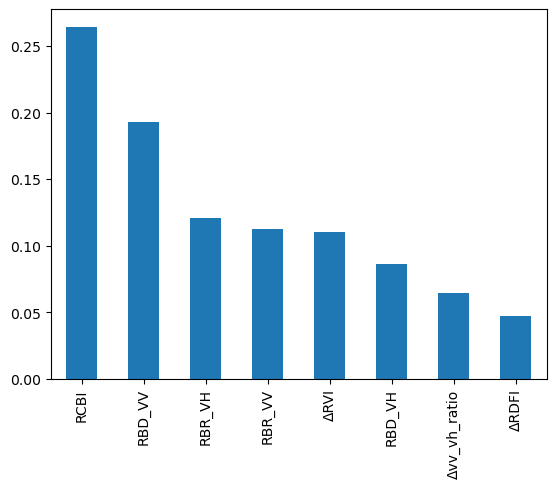

In [11]:
# Create a series containing feature importances from the model and feature names from the training data

feature_importances = pd.Series(RF_Model_0.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Plot a simple bar chart
feature_importances.plot.bar()

              Dnbr1  dTRAD1  RBD_VV  RBD_VH  RBR_VV  RBR_VH  ΔRVI  \
Dnbr1          1.00    0.71    0.33   -0.02    0.25   -0.11 -0.27   
dTRAD1         0.71    1.00    0.14   -0.07    0.11   -0.22 -0.26   
RBD_VV         0.33    0.14    1.00   -0.10    0.62   -0.04 -0.51   
RBD_VH        -0.02   -0.07   -0.10    1.00    0.01    0.63  0.46   
RBR_VV         0.25    0.11    0.62    0.01    1.00    0.09 -0.67   
RBR_VH        -0.11   -0.22   -0.04    0.63    0.09    1.00  0.68   
ΔRVI          -0.27   -0.26   -0.51    0.46   -0.67    0.68  1.00   
Δvv_vh_ratio   0.27    0.25    0.48   -0.46    0.67   -0.68 -1.00   
ΔRDFI          0.22    0.20    0.36   -0.44    0.62   -0.67 -0.93   
RCBI           0.33    0.13    1.00    0.00    0.62    0.02 -0.46   

              Δvv_vh_ratio  ΔRDFI  RCBI  
Dnbr1                 0.27   0.22  0.33  
dTRAD1                0.25   0.20  0.13  
RBD_VV                0.48   0.36  1.00  
RBD_VH               -0.46  -0.44  0.00  
RBR_VV                0.67   0

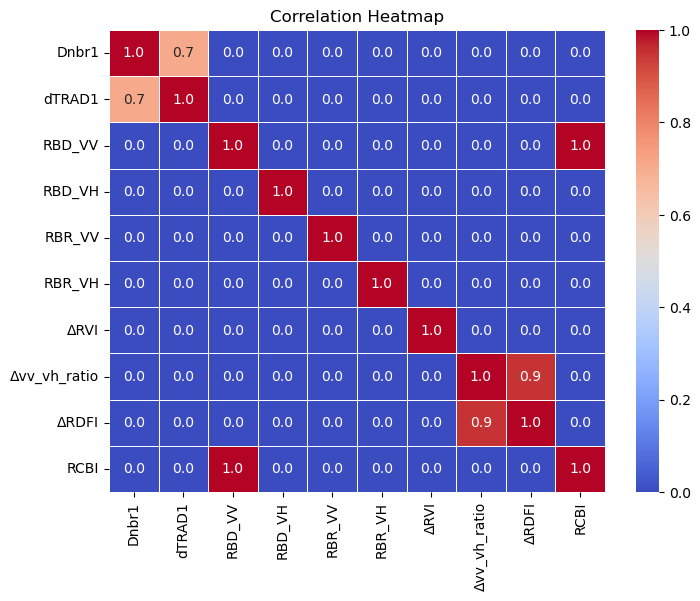

In [12]:
import seaborn as sns
corr_mat_export_path="output/correlation/cor_mat.csv"
# Compute Pearson correlation matrix
training_data_1 = training_data.drop(columns=['id','class','geometry'])
correlation_matrix = training_data_1.corr(method='pearson').round(2)
print(correlation_matrix)
correlation_matrix = correlation_matrix.applymap(lambda x: x if x >= 0.7 else 0)
correlation_matrix.to_csv(corr_mat_export_path, index=True)

# corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## prediction for entire image

In [13]:
# def predict(model, image_path,model_name ):
#     dataset = rasterio.open(image_path)
#     print(dataset.count)
#     # # Load the SAR GeoTIFF
#     # image_path = "../SAR_Data_processing/11_export/palisades_indices_subset.tif"
#     # dataset = rasterio.open(image_path)

#     # Read the image bands into an array (assuming it's a multi-band raster)
#     sar_bands = np.stack([dataset.read(i+1) for i in range(dataset.count)], axis=-1)

#     # Reshape the SAR data to a 2D array (num_pixels, num_bands)
#     height, width, num_bands = sar_bands.shape
#     pixels = sar_bands.reshape(-1, num_bands)  # Each row is a pixel
#     print(num_bands,"num_bands")

#     # Preprocess (scale) the pixel values if needed (based on training data preprocessing)
#     # scaler = StandardScaler()
#     # pixels_scaled = scaler.fit_transform(pixels)  # Apply scaling to the pixels

#     # Predict for each pixel
#     predictions = model.predict(pixels)

#     from scipy.ndimage import uniform_filter
#     # Assuming predictions are a 2D array (for an image or spatial data)
#     predictions = uniform_filter(predictions, size=7)  # size is the window size

#     # predictions = model.predict(scaler.transform(pixels))


#     # Reshape predictions to match the image dimensions
#     predicted_image = predictions.reshape(height, width)

#     # Save the predicted classes to a new file
#     output_path = f"output/prediction/eaton_{model_name}_{extended_file_name}.tif"
#     meta = dataset.meta
#     meta.update(dtype=rasterio.uint8, count=1)  # Assuming class labels are integers, uint8 works for this

#     with rasterio.open(output_path, 'w', **meta) as dest:
#         dest.write(predicted_image.astype(rasterio.uint8), 1)  # Write to the first band

#     print(f"Predictions saved to {output_path}")

#     pred_dataset = rasterio.open(output_path)

#     # Read the first band of the image (you can adjust for multi-band images)
#     pred_band_1 = pred_dataset.read(1)

#     # Plot the image
#     plt.figure(figsize=(10, 10))
#     plt.imshow(pred_band_1, cmap='gray')  # You can adjust the colormap if needed
#     plt.colorbar()
#     plt.title("SAR Burnt Area Prediction Map")
#     plt.show()


In [14]:
# ml_models=os.listdir(output_model_dir)
# for model_name in ml_models:
#     output_model_path = os.path.join(output_model_dir, model_name)
#     # Load the saved model
#     loaded_model = joblib.load(output_model_path)

#     # Use the loaded model to make predictions
#     # predictions = loaded_model.predict(X_test)
#     predict(loaded_model, sar_image_path,model_name.replace(".pkl",""))

## plot AUC curve

In [15]:
## plot ROC AUC Curve
plt.figure()
auc_models = [{
    'label': 'Random Forest Classifier',
    'model': RF_Model,
    'auc':0.73
}]

for algo in auc_models:
    model=algo['model']
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr,tpr,label="Random Forest Classifier ROC (area= 0.71)")

    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver operating characteristics')

    plt.legend(loc="lower right")

    plt.savefig("auc.png")
    plt.show()

    # Open the TIFF file using rasterio
    # output_path = "palisades_predictions.tif"  # Replace with your TIFF file path
    


NameError: name 'RF_Model' is not defined

<Figure size 640x480 with 0 Axes>